In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_data_set.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, accuracy_score, classification_report
import pickle
%matplotlib inline

In [3]:
FILEPATH = '../input/loan-data-set/loan_data_set.csv'

In [4]:
df = pd.read_csv(FILEPATH)
df.sample(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
350,LP002139,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban,Y
394,LP002266,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,Y
377,LP002223,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban,Y
547,LP002772,Male,No,0,Graduate,No,2526,1783.0,145.0,360.0,1.0,Rural,Y
336,LP002110,Male,Yes,1,Graduate,NaN,5250,688.0,160.0,360.0,1.0,Rural,Y
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N
360,LP002161,Female,No,1,Graduate,No,4723,0.0,81.0,360.0,1.0,Semiurban,N


In [5]:
df.drop(['Loan_ID', 'Gender', 'Dependents', 'Married', 'Property_Area', 'Education'], axis=1, inplace=True) #Using a small set of cols here
df.head()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,No,5849,0.0,NaN,360.0,1.0,Y
1,No,4583,1508.0,128.0,360.0,1.0,N
2,Yes,3000,0.0,66.0,360.0,1.0,Y
3,No,2583,2358.0,120.0,360.0,1.0,Y
4,No,6000,0.0,141.0,360.0,1.0,Y


In [6]:
df.isnull().sum().any()

True

In [7]:
df.isnull().sum()

Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

In [8]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
df.Credit_History.fillna(0.0, inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

In [10]:
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)
df.Self_Employed.fillna('No', inplace=True)
#df.Married.fillna('No', inplace=True)

In [11]:
df.isnull().sum().any()

False

In [12]:
df['Credit_History'] = df['Credit_History'].astype('int64')
df.dtypes

Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Loan_Status           object
dtype: object

In [13]:
le = LabelEncoder()
cols = df.columns.tolist()
for column in cols:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [14]:
df.dtypes

Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Loan_Status            int64
dtype: object

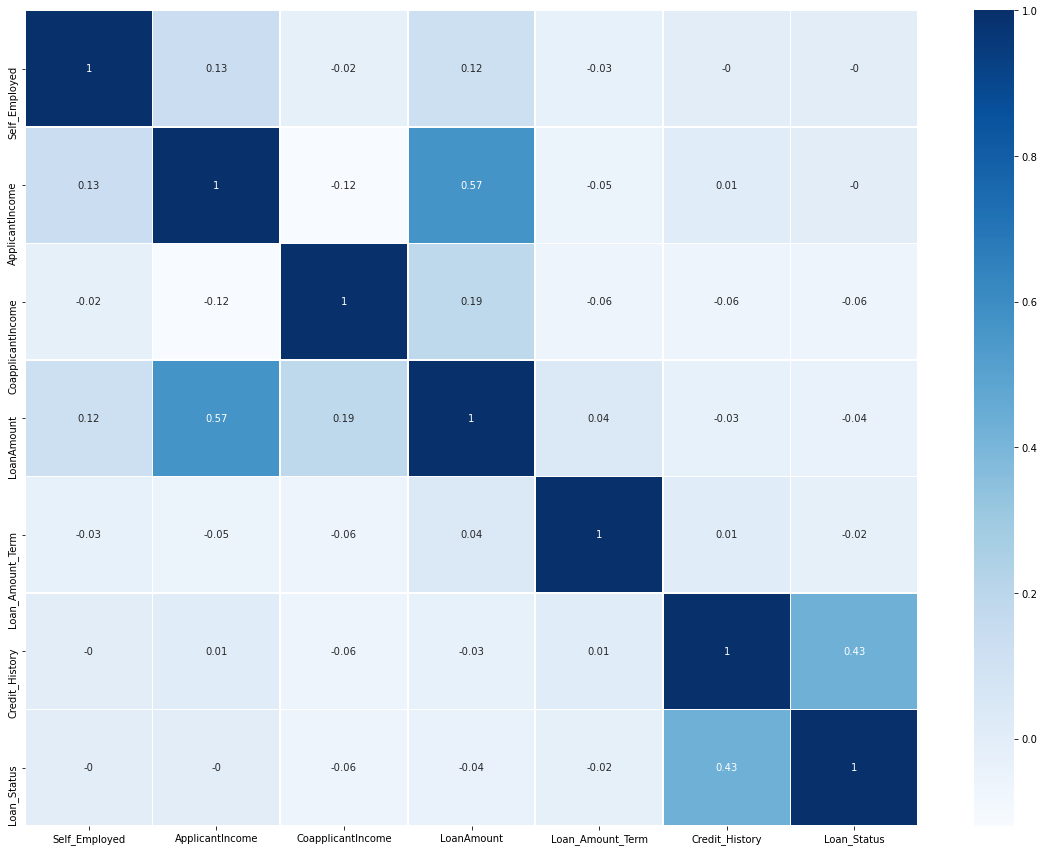

In [15]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data=df.corr().round(2), annot=True, linewidths=0.7, cmap='Blues')
plt.show()

In [16]:
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=30) 

In [18]:
classifiers = {
    'Multinomial NB': MultinomialNB(),
    'Gaussian NB': GaussianNB(),
    'Linear SVM': SVC(kernel='linear'),
    'RBF SVM': SVC(kernel='rbf'),
    'Sigmoid SVM': SVC(kernel='sigmoid'),
    #FOR SVM USE HYPERPARAMETER TUNING TO BETTER UNDERSTAND WHAT TO TAKE
    'MLP Classifier': MLPClassifier(),
    'MLP Hidden Layer': MLPClassifier(hidden_layer_sizes=[100,100]),
    'Ada Boost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression()
}

In [19]:
acc_scores = dict()

for classifier in classifiers:
    
    clf = classifiers[classifier]
    clf.fit(Xtrain,ytrain)
    y_pred = clf.predict(Xtest)
    acc_scores[classifier] = accuracy_score(y_pred, ytest)
    print(classifier, acc_scores[classifier])

Multinomial NB 0.4918918918918919
Gaussian NB 0.7135135135135136
Linear SVM 0.7405405405405405
RBF SVM 0.7189189189189189
Sigmoid SVM 0.6162162162162163
MLP Classifier 0.654054054054054
MLP Hidden Layer 0.6918918918918919
Ada Boost 0.7189189189189189
Decision Tree 0.6756756756756757
Random Forest 0.7297297297297297
Gradient Boosting 0.7405405405405405
Logistic Regression 0.7513513513513513


In [20]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred, ytest)))
print(confusion_matrix(ytest, y_pred))
print("Classification Report for Logistic Regression")
print(classification_report(ytest, y_pred))

Accuracy: 75.13513513513513%
[[ 20  31]
 [ 15 119]]
Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.57      0.39      0.47        51
           1       0.79      0.89      0.84       134

    accuracy                           0.75       185
   macro avg       0.68      0.64      0.65       185
weighted avg       0.73      0.75      0.74       185



# Saving a model file

The most popular way of saving a model file is by using pickle.

## Logistic Regression

In [21]:
filename = 'logistic_model.p'
pickle.dump(model, open('./'+filename, 'wb'))

## Random Forest Classifier

In [22]:
filename = 'rand_forest_model.p'

model = RandomForestClassifier()
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred, ytest)))
print(confusion_matrix(ytest, y_pred))
print("Classification Report for Random Forest Classifier")
print(classification_report(ytest, y_pred))

pickle.dump(model, open('./'+filename, 'wb'))

Accuracy: 75.13513513513513%
[[ 21  30]
 [ 16 118]]
Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           0       0.57      0.41      0.48        51
           1       0.80      0.88      0.84       134

    accuracy                           0.75       185
   macro avg       0.68      0.65      0.66       185
weighted avg       0.73      0.75      0.74       185



## Decision Tree Classifier

In [23]:
filename = 'dec_tree_model.p'

model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred, ytest)))
print(confusion_matrix(ytest, y_pred))
print("Classification Report for Decision Tree Classifier")
print(classification_report(ytest, y_pred))

pickle.dump(model, open('./'+filename, 'wb'))

Accuracy: 69.72972972972973%
[[ 24  27]
 [ 29 105]]
Classification Report for Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        51
           1       0.80      0.78      0.79       134

    accuracy                           0.70       185
   macro avg       0.62      0.63      0.63       185
weighted avg       0.70      0.70      0.70       185



## Gaussian Naïve Bayes

In [24]:
filename = 'gaussian_nb_model.p'

model = GaussianNB()
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred, ytest)))
print(confusion_matrix(ytest, y_pred))
print("Classification Report for Gaussian Naïve Bayes")
print(classification_report(ytest, y_pred))

pickle.dump(model, open('./'+filename, 'wb'))

Accuracy: 71.35135135135135%
[[ 20  31]
 [ 22 112]]
Classification Report for Gaussian Naïve Bayes
              precision    recall  f1-score   support

           0       0.48      0.39      0.43        51
           1       0.78      0.84      0.81       134

    accuracy                           0.71       185
   macro avg       0.63      0.61      0.62       185
weighted avg       0.70      0.71      0.70       185



## Linear Kernel SVM

In [25]:
filename = 'linear_svm_model.p'

model = SVC(kernel='linear')
model.fit(Xtrain, ytrain)

y_pred = model.predict(Xtest)
print("Accuracy: %s%%" % (100*accuracy_score(y_pred, ytest)))
print(confusion_matrix(ytest, y_pred))
print("Classification Report for Linear Kernel SVM")
print(classification_report(ytest, y_pred))

pickle.dump(model, open('./'+filename, 'wb'))

Accuracy: 74.05405405405405%
[[ 12  39]
 [  9 125]]
Classification Report for Linear Kernel SVM
              precision    recall  f1-score   support

           0       0.57      0.24      0.33        51
           1       0.76      0.93      0.84       134

    accuracy                           0.74       185
   macro avg       0.67      0.58      0.59       185
weighted avg       0.71      0.74      0.70       185

